In [20]:
#参考：https://www.randpy.tokyo/entry/python_random_forest
import pandas as pd
df = pd.read_csv('./titanic/train.csv')

In [21]:
df


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

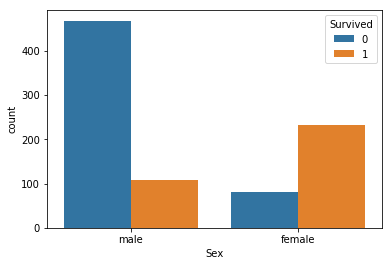

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot('Sex', hue='Survived', data=df)

In [23]:
from sklearn.model_selection import train_test_split
#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')




In [24]:
#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)
#次元削減
df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [25]:
train_X = df.drop('Survived', axis=1)

In [26]:
train_y = df.Survived

In [27]:
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [29]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

In [30]:
pred = clf.predict(test_X)
#評価指標のROCとAUCを使ってみる　参考：https://www.randpy.tokyo/entry/roc_auc
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)

accuracy_score(pred, test_y)

0.7947761194029851

In [31]:
#1に近ければよい
auc(fpr, tpr)

0.7837689688996596

In [32]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

In [34]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names=train_X.columns, max_depth=3)


NameError: name 'export_graphviz' is not defined

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'write_pdf'

In [35]:
#ここからがランダムフォレスト

In [46]:
from sklearn.ensemble import RandomForestClassifier
#回帰では、regressionを使用している
#パラメータ：n_estimators(決定木の数)を10（default）→20に変更した
clf = RandomForestClassifier(random_state=0, n_estimators=20)
clf = clf.fit(train_X, train_y)

In [47]:
pred = clf.predict(test_X)

In [48]:
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)

In [49]:
auc(fpr, tpr)

0.8043390456407594

In [50]:
accuracy_score(pred, test_y)

0.8208955223880597

In [51]:
#ランダムフォレストでは、どの変数が重要であったかをfeature_importancesというメソッドを使うことで出すことができます。

In [54]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
features = train_X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

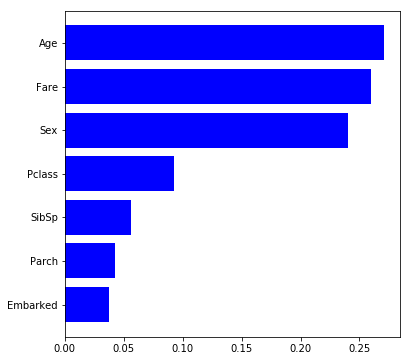

In [57]:
plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()